# Import necessary libraries

In [1]:
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the MobileNetV2 model pretrained on ImageNet

In [2]:
model = MobileNetV2(weights='imagenet')

# Load and preprocess the image

In [3]:
img_path = 'dog.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions using the model

In [4]:
predictions = model.predict(img_array)

1/1 [==============================] - 1s 930ms/step


# Decode and get the top predicted class label

In [5]:
decoded_predictions = decode_predictions(predictions, top=1)[0]
top_label = decoded_predictions[0][1]
top_confidence = decoded_predictions[0][2]


# Display the image and top label

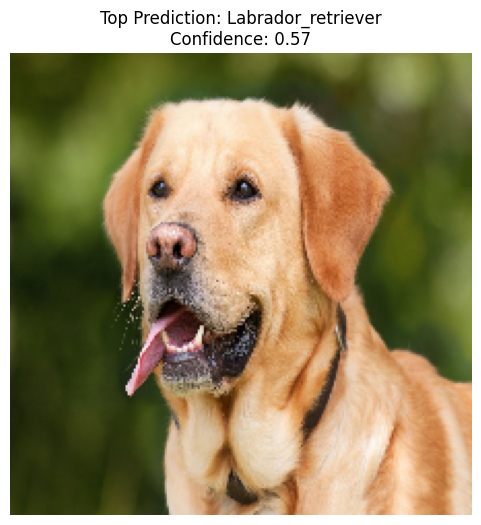

In [6]:
if top_confidence > 0.4:
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Top Prediction: {top_label}\nConfidence: {top_confidence:.2f}')
    plt.axis('off')
    plt.show()
else:
    print(f"The top prediction '{top_label}' has confidence below 40% and will not be displayed.")